In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import biosppy.signals.ecg as ecg
from IPython.display import clear_output

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.impute import SimpleImputer

sys.path.append('..')
from util import load_datasets_concat, replace_infinities, load_base_data

plt.rcParams['figure.figsize'] = [6, 5]
SAMPLING_RATE = 300

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/home/freej/miniconda3/envs/pai/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Load data

In [2]:
data = [
    "entropy/flipped",
    "global/flipped", "global/standardized",
    "interval_derivatives/flipped",
    "tsfresh/stand_flip", 
    "hrv/nn", "hrv/rr", 
    "morph"
]
X_train, y_train, X_test = load_datasets_concat(data, data_path="../data")

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [4]:
replace_infinities(X_train, X_val)
imputer = SimpleImputer()
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_val = imputer.transform(X_val)

In [5]:
model = XGBClassifier(gamma=1.6)
model.fit(X_train, y_train)

/home/freej/miniconda3/envs/pai/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/freej/miniconda3/envs/pai/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/freej/miniconda3/envs/pai/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

[23:53:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=1.6, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [6]:
train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
print(f'Train accuracy: {train_acc}')

Train accuracy: 0.9848521866601515


In [7]:
val_pred = model.predict(X_val)
val_acc = accuracy_score(y_val, val_pred)
print(f'Validation accuracy: {val_acc}')

Validation accuracy: 0.8095703125


## Confusion matrix

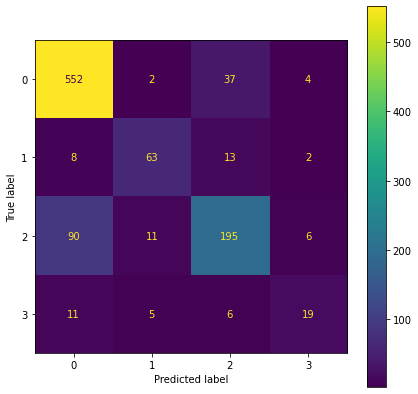

In [29]:
plt.rcParams['figure.figsize'] = [7, 7]
ConfusionMatrixDisplay.from_predictions(y_val, val_pred)

## Plot misclassified signals

In [9]:
signal_train, _, _ = load_base_data()

In [10]:
val_pred = pd.DataFrame(val_pred, index=y_val.index)
y_val.sort_index(inplace=True)
val_pred.sort_index(inplace=True)
incorrectly_classified = y_val.index[y_val.values.flatten() != val_pred.values.flatten()]

In [43]:
zeros

Int64Index([  12,   19,   23,   43,   45,   51,   61,   62,   65,   68,
            ...
            5026, 5030, 5039, 5070, 5075, 5091, 5092, 5093, 5107, 5113],
           dtype='int64', name='id', length=595)

In [44]:
twos

Int64Index([   8,   17,   26,   47,   69,   75,   90,   95,  100,  109,
            ...
            5003, 5004, 5008, 5009, 5018, 5041, 5056, 5058, 5080, 5098],
           dtype='int64', name='id', length=302)

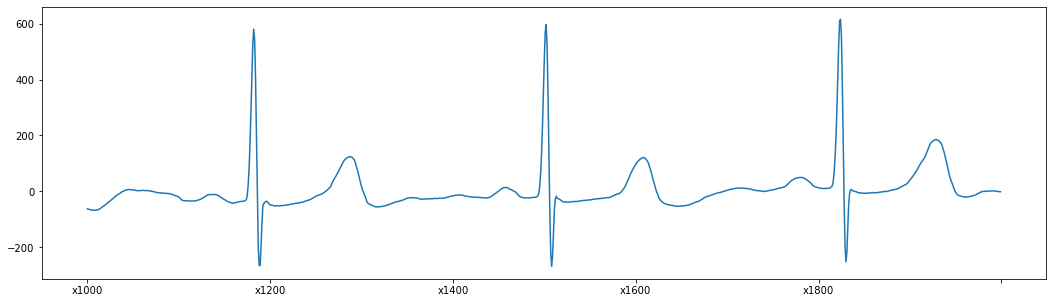

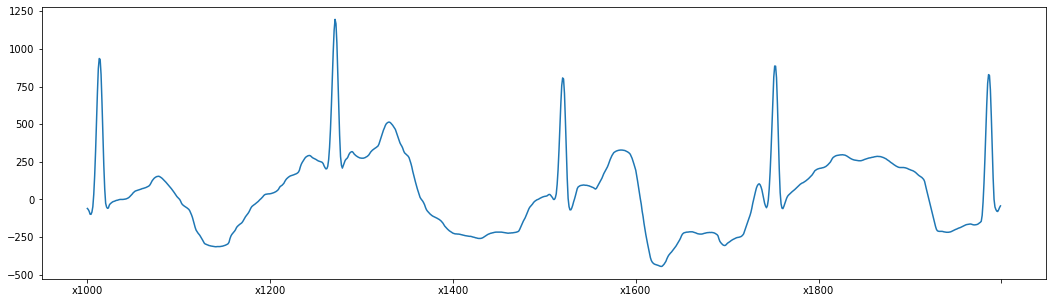

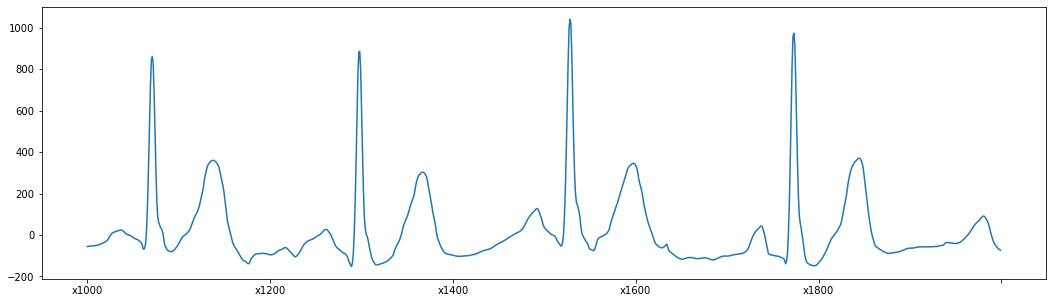

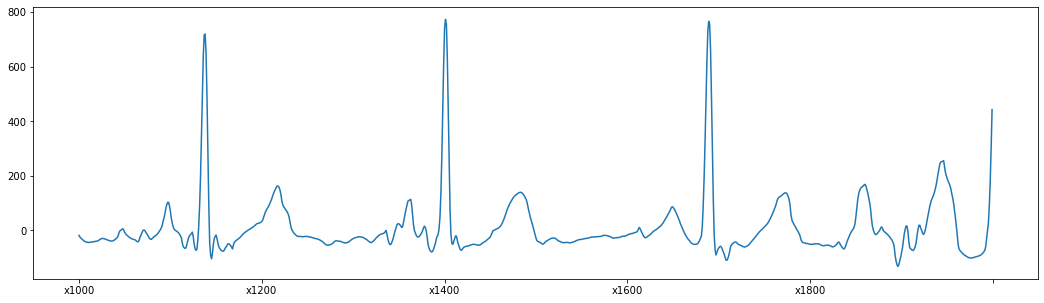

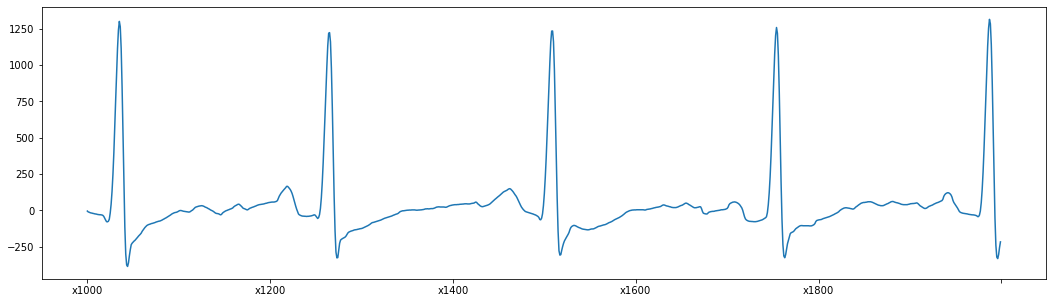

In [41]:
plt.rcParams['figure.figsize'] = [18, 5]
zeros = y_val[y_val['y'] == 0].index
for i in range(5):
    signal_train.loc[zeros[i]][1000:2000].plot()
    plt.show()

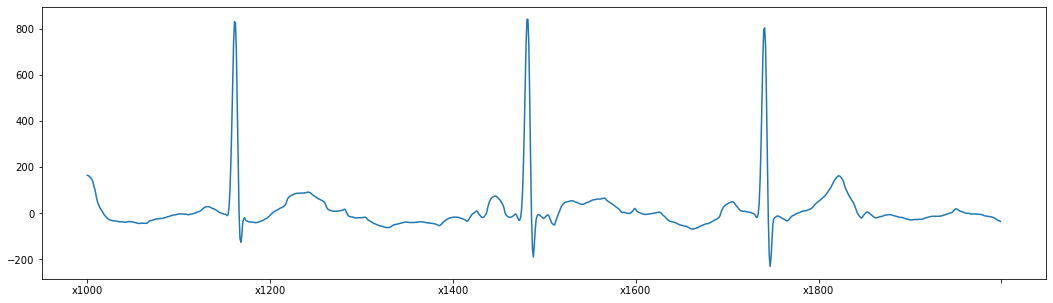

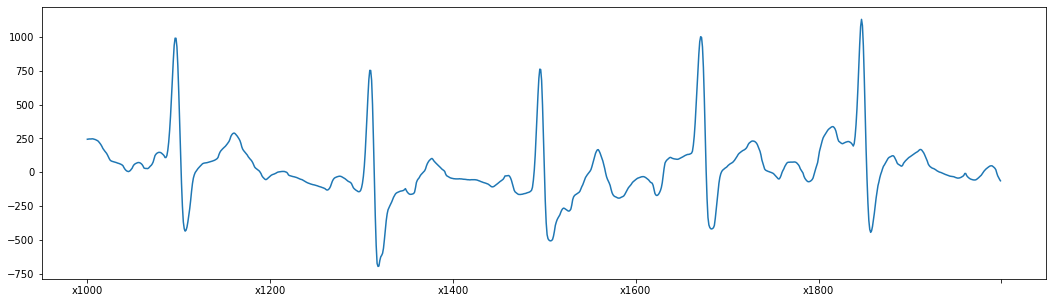

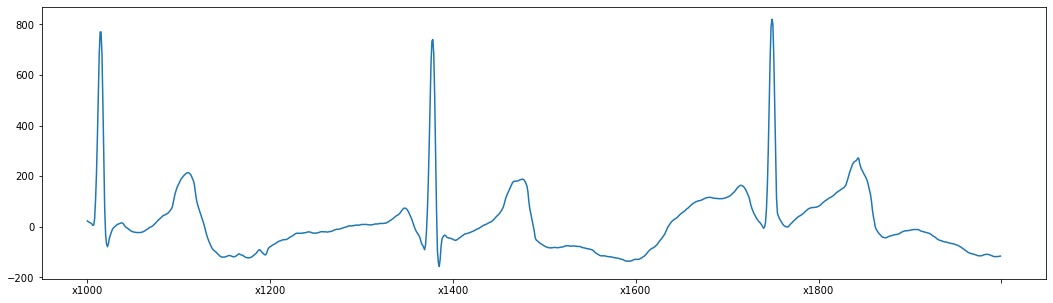

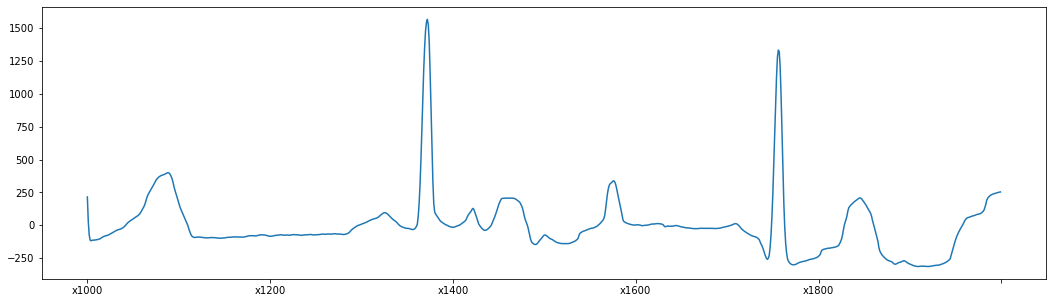

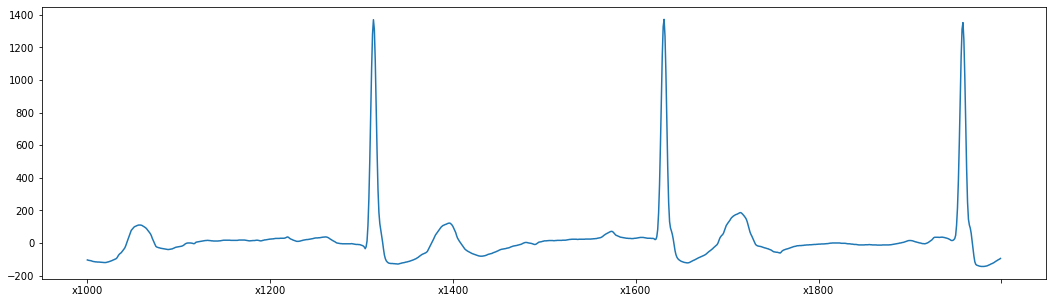

In [42]:
twos = y_val[y_val['y'] == 2].index
for i in range(5):
    signal_train.loc[twos[i]][1000:2000].plot()
    plt.show()

index 1103
true 2	pred 0


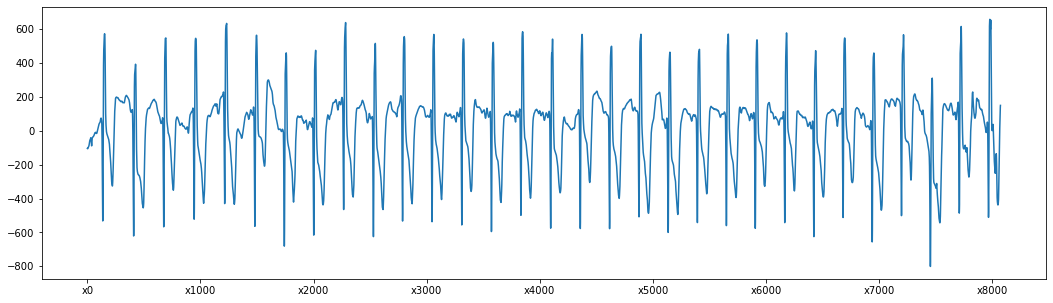

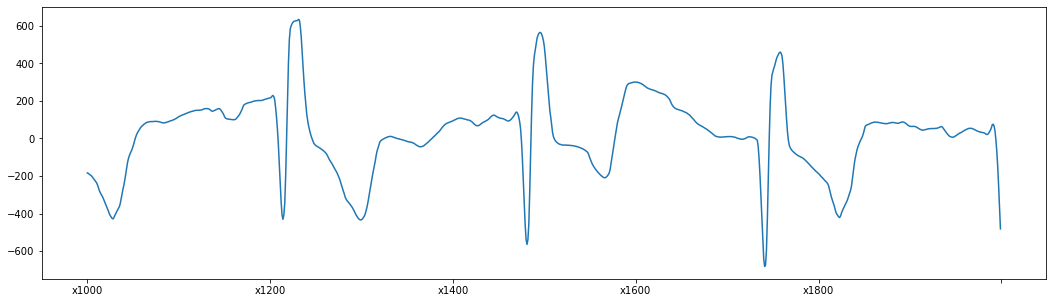

In [ ]:
plt.rcParams['figure.figsize'] = [18, 5]
def show_missc_signal(i, signals, y_true, y_pred):
    true_class = y_true.loc[i].values[0]
    pred_class = y_pred.loc[i].values[0]
    if true_class != 2 or pred_class != 0:
        return
        
    print(f'index {i}')
    print(f'true {true_class}\tpred {pred_class}')
    
    signal_train.loc[i].plot()
    plt.show()
    signal = signal_train.loc[i][1000:2000]
    signal.plot()
    plt.show()
    clear_output(wait=True)
    c = input()
    if c == 'q':
        return True
    return False
    
for i in incorrectly_classified:
    if show_missc_signal(i, signal_train, y_val, val_pred):
        break

In [ ]:
# Zooming in
show_missc_signal(i, signal_train, y_val, val_pred)

## Plot function

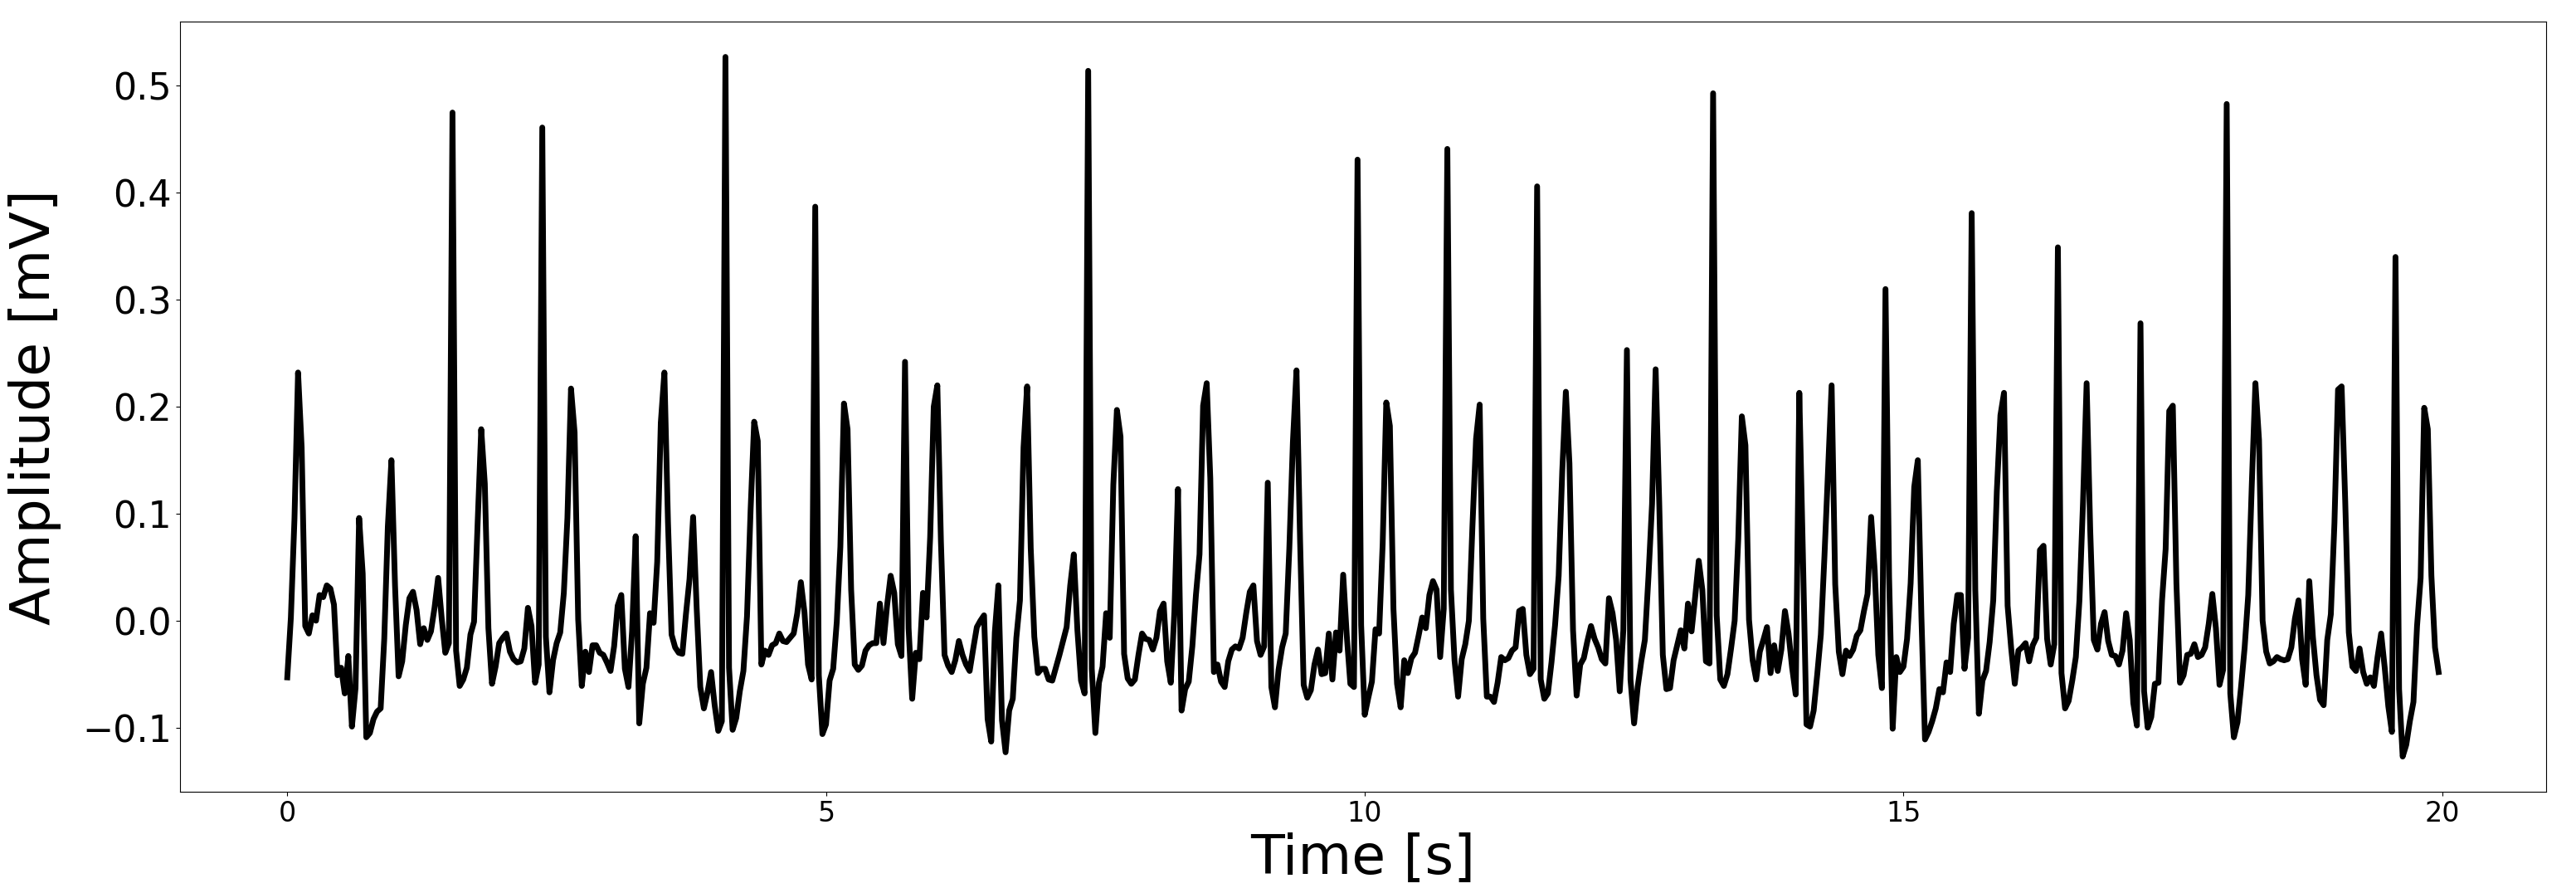

In [74]:
def plot_signals(signals):
    # Some matplotlib setting 
    plt.rcParams["figure.figsize"] = (30, 20)
    plt.rcParams['lines.linewidth'] = 5
    plt.rcParams['xtick.labelsize'] = 24
    plt.rcParams['ytick.labelsize'] = 32
    plt.rcParams['axes.labelsize'] = 48
    plt.rcParams['axes.titlesize'] = 48
    
    n_signals = len(signals)

    fig, axs = plt.subplots(n_signals, 1)

    seconds = np.arange(0, 600) / 30 
    x_labels = [0, 5, 10, 15, 20]

    for class_id in range(n_signals):
        ax = axs[class_id]
        #ax.set_title("Class {}".format(class_id))

        measurements = data.loc[sample_signal_ids[class_id]].dropna().to_numpy(dtype='float32')
        # Get a subsequence of a signal and downsample it for visualization purposes
        measurements = measurements[1000:7000:10] 
        # convert volts to millivolts
        measurements /= 1000
        ax.plot(seconds, measurements, color='k')
        ax.set_xticks(x_labels)

    fig.tight_layout()

    # Display x- and y-labels for the whole plot
    ax = fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    ax.yaxis.set_label_coords(-0.05, 0.5)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude [mV]')            
    plt.show()

In [63]:
def plot_features(signal):
    r_peaks = ecg.engzee_segmenter(signal, 300)['rpeaks']
    #print(r_peaks)
    if len(r_peaks) >= 2:
        #print(ecg.extract_heartbeats(signal, r_peaks, 300))
        beats = ecg.extract_heartbeats(signal, r_peaks, 300)['templates']

        if len(beats) != 0:
            mu = np.mean(beats, axis=0) 
            var = np.std(beats, axis=0)
            md = np.median(beats, axis=0)
            
            plt.plot(range(mu.shape[0]), mu, label='Average HeartBeat')
            # Fill the variance range
            plt.fill_between(range(mu.shape[0]), mu - var, mu + var, linewidth=0, alpha=0.1)
            # Plot a median
            plt.plot(range(md.shape[0]), md, 'k', label='Median HeartBeat', color='#CC4F1B')

/var/folders/9n/05q2x7z51ddbt1bfvj8nvl380000gn/T/ipykernel_19287/2348902154.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(range(md.shape[0]), md, 'k', label='Median HeartBeat', color='#CC4F1B')


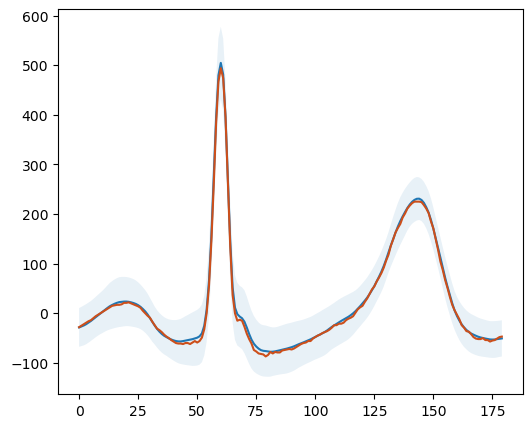

In [64]:
signal = X_train.loc[0].dropna().to_numpy(dtype='float32')
plot_features(signal)

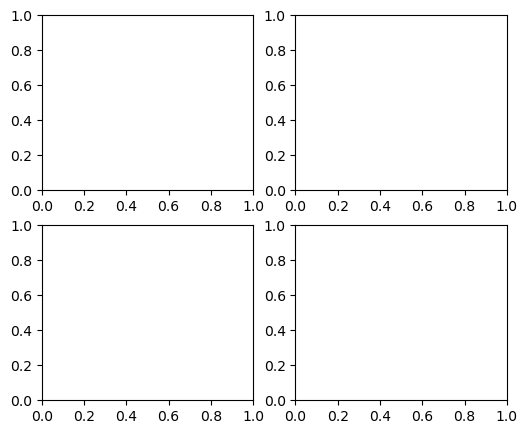

In [66]:
cls = 0
figure, axis = plt.subplots(2, 2)
for i in range(len(y_train[:1])):
    target = y_train.loc[i].y
    pred = y_train_pred.loc[i].y
    if pred != target:
#         print(i, pred, target)
        figure, axis = plt.subplots(2, 2)
#     X_train.loc[0].dropna().to_numpy(dtype='float32')

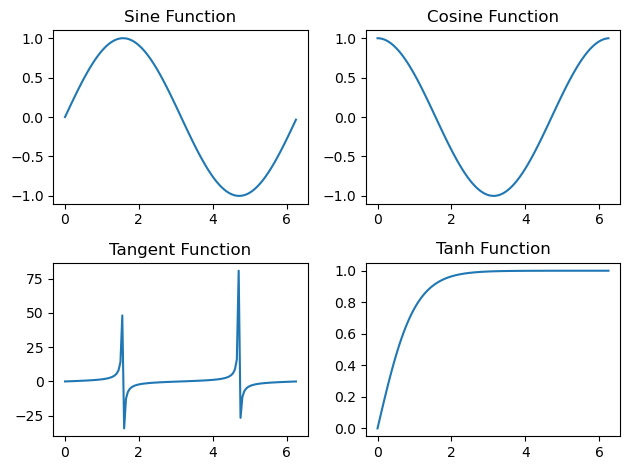

In [4]:
# Get the angles from 0 to 2 pie (360 degree) in narray object
X = np.arange(0, math.pi*2, 0.05)
  
# Using built-in trigonometric function we can directly plot
# the given cosine wave for the given angles
Y1 = np.sin(X)
Y2 = np.cos(X)
Y3 = np.tan(X)
Y4 = np.tanh(X)
  
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
  
# For Sine Function
axis[0, 0].plot(X, Y1)
axis[0, 0].set_title("Sine Function")
  
# For Cosine Function
axis[0, 1].plot(X, Y2)
axis[0, 1].set_title("Cosine Function")
  
# For Tangent Function
axis[1, 0].plot(X, Y3)
axis[1, 0].set_title("Tangent Function")
  
# For Tanh Function
axis[1, 1].plot(X, Y4)
axis[1, 1].set_title("Tanh Function")
  
# Combine all the operations and display
figure.tight_layout()
plt.show()

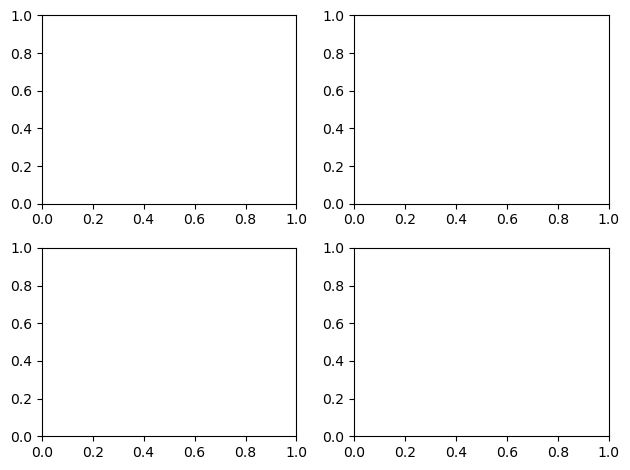

In [5]:
figure, axis = plt.subplots(2, 2)
figure.tight_layout()
plt.show()